<h3>Elementary School Analysis - Charlotte, NC</h3>

<h6>Utilized "NC School Report Cards" as a Data Source (ncpublicschools.org)</h6></n>
<h6>Demographics pulled from schooldigger.com</h6></n>
<h6>Schools analyzed are within my geographical area of Charlotte</h6>
<h6>Updated 6-17-2019</h6>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#Find and load data 
datDir = (r'C:\Users\Reaper124\Documents\School_Data\ElemSchoolData.csv')
datdf = pd.read_csv(datDir)
datdf.head(5)

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
1,charlotte lab,66.02,67.2,61.3,73.4,64.1,52.9,404.0,15.0,66.8,13.4,7.2,1.7,10.6
2,brookstone schools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,metro school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,first ward creative arts academy,58.10,58.8,55.3,52.4,61.5,69.8,572.0,14.3,5.2,67.7,22.2,0.3,4.5


In [3]:
datdf['Performance Score'].dtype

dtype('float64')

<h2>Data Preparation Section</h2>

In [4]:
#remove missing values
datdf = datdf.dropna(axis=0)
#datdf['School Name'] = datdf['School Name'].str.upper()
datdf

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
1,charlotte lab,66.02,67.2,61.3,73.4,64.1,52.9,404.0,15.0,66.8,13.4,7.2,1.7,10.6
4,first ward creative arts academy,58.10,58.8,55.3,52.4,61.5,69.8,572.0,14.3,5.2,67.7,22.2,0.3,4.5
5,billingsville elementary,48.92,40.5,82.6,32.2,44.3,55.8,329.0,13.8,1.2,83.0,11.2,2.4,2.1
6,cotswold elementary,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2
7,rama road elementary,58.86,50.9,90.7,40.9,54.0,65.7,603.0,15.2,19.7,45.4,28.0,4.5,2.3
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
11,Oakhurst STEAM Academy,57.12,55.2,64.8,44.6,57.6,70.3,631.0,15.5,15.5,44.2,31.2,6.5,2.6


In [5]:
datdf['Growth Score'].dtype

dtype('float64')

In [6]:
#Basic descriptive statistics for the dataframe
datdf.describe()

,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,70.474286,69.092857,76.000000,65.335714,70.207143,76.078571,589.857143,16.457143,45.971429,35.021429,11.707143,3.971429,3.264286
std,12.194630,14.456591,10.292492,17.482545,13.968286,12.678824,183.864439,1.559445,28.581905,23.839404,8.994910,3.082314,2.311046
min,48.920000,40.500000,55.300000,32.200000,44.300000,52.900000,292.000000,13.800000,1.200000,9.200000,3.000000,0.300000,1.200000
25%,60.650000,60.400000,71.500000,54.775000,60.375000,68.600000,456.750000,15.275000,19.025000,14.025000,6.650000,1.775000,2.150000
50%,69.890000,68.200000,78.750000,66.100000,71.250000,77.600000,587.500000,16.550000,61.350000,25.900000,7.950000,2.600000,2.600000
75%,82.835000,82.850000,83.200000,79.275000,80.850000,87.475000,725.000000,17.900000,69.200000,48.175000,12.200000,6.000000,3.500000
max,86.340000,87.400000,90.700000,87.200000,89.500000,92.300000,860.000000,18.400000,79.300000,83.000000,31.200000,9.200000,10.600000


<h2>Exploratory Analysis</h2>

In [7]:
#Sort schools based on Performance score
datdf.sort_values('Performance Score', ascending = False, inplace= True)
datdf.head(7)

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
6,cotswold elementary,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2
14,Myers Park Traditional,70.08,67.3,81.2,62.6,71.8,68.2,704.0,18.4,33.4,49.1,6.8,8.5,2.1


In [8]:
#Sort schools based on Achievement score
datdf.sort_values('Achievement Score', ascending = False, inplace= True)
datdf.head(7)

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
6,cotswold elementary,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2
12,Elizabeth Traditional Elementary,69.70,69.1,72.1,61.9,72.5,79.8,536.0,17.1,18.8,63.1,12.5,2.8,2.8


In [9]:
#Sort schools based on Growth score
datdf.sort_values('Growth Score', ascending = False, inplace= True)
datdf.head(7)

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
7,rama road elementary,58.86,50.9,90.7,40.9,54.0,65.7,603.0,15.2,19.7,45.4,28.0,4.5,2.3
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
5,billingsville elementary,48.92,40.5,82.6,32.2,44.3,55.8,329.0,13.8,1.2,83.0,11.2,2.4,2.1
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
14,Myers Park Traditional,70.08,67.3,81.2,62.6,71.8,68.2,704.0,18.4,33.4,49.1,6.8,8.5,2.1


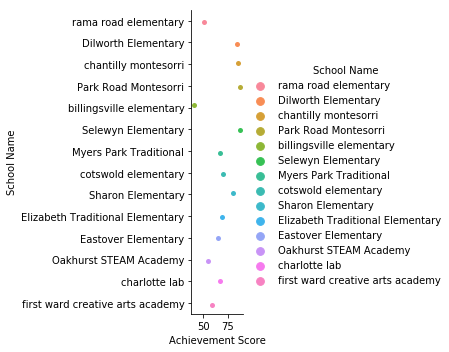

In [10]:
#catplot of achievement score based on school
splot = sns.catplot(x="Achievement Score", y="School Name", hue='School Name', data=datdf)

Text(0.5, 1.0, 'School Achievement Score Scatter Plot')

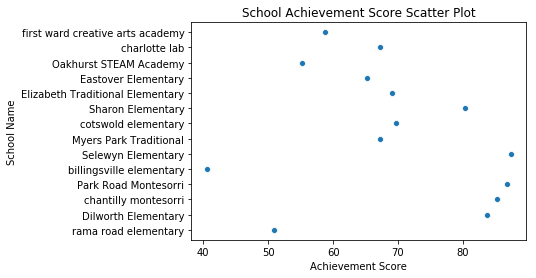

In [11]:
#Scatter plot of Property vs. Total Lease
scatterplot = sns.scatterplot(x="Achievement Score", y="School Name", data=datdf)
ax = plt.gca()
ax.set_title("School Achievement Score Scatter Plot")

Text(0.5, 1.0, 'School Performance Score')

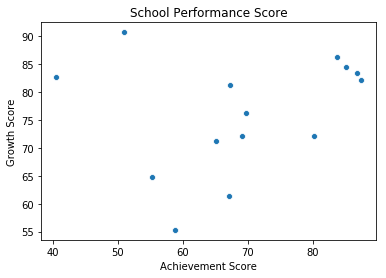

In [12]:
#Scatter plot of Achievement vs. Growth Score
scatterplot = sns.scatterplot(x="Achievement Score", y="Growth Score", data=datdf)
ax = plt.gca()
ax.set_title("School Performance Score")

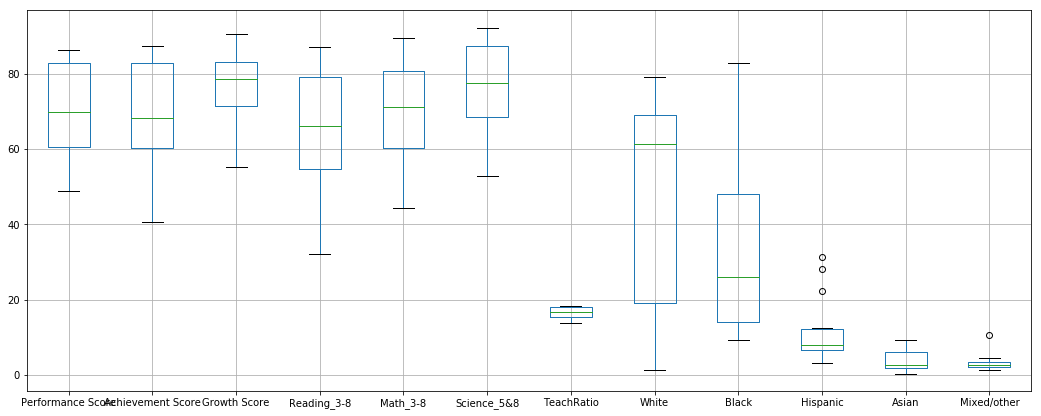

In [13]:
#pd.options.display.mpl_style = 'default'
fig, ax = plt.subplots(figsize=(18,7))
datdf[['Performance Score','Achievement Score','Growth Score','Reading_3-8','Math_3-8','Science_5&8','TeachRatio','White','Black','Hispanic','Asian','Mixed/other']].boxplot()

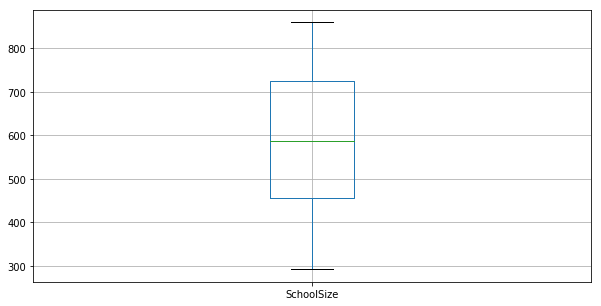

In [14]:
#School Size Boxplot
#pd.options.display.mpl_style = 'default'
fig, ax = plt.subplots(figsize=(10,5))
datdf[['SchoolSize']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C45908FB00>,
      dtype=object)

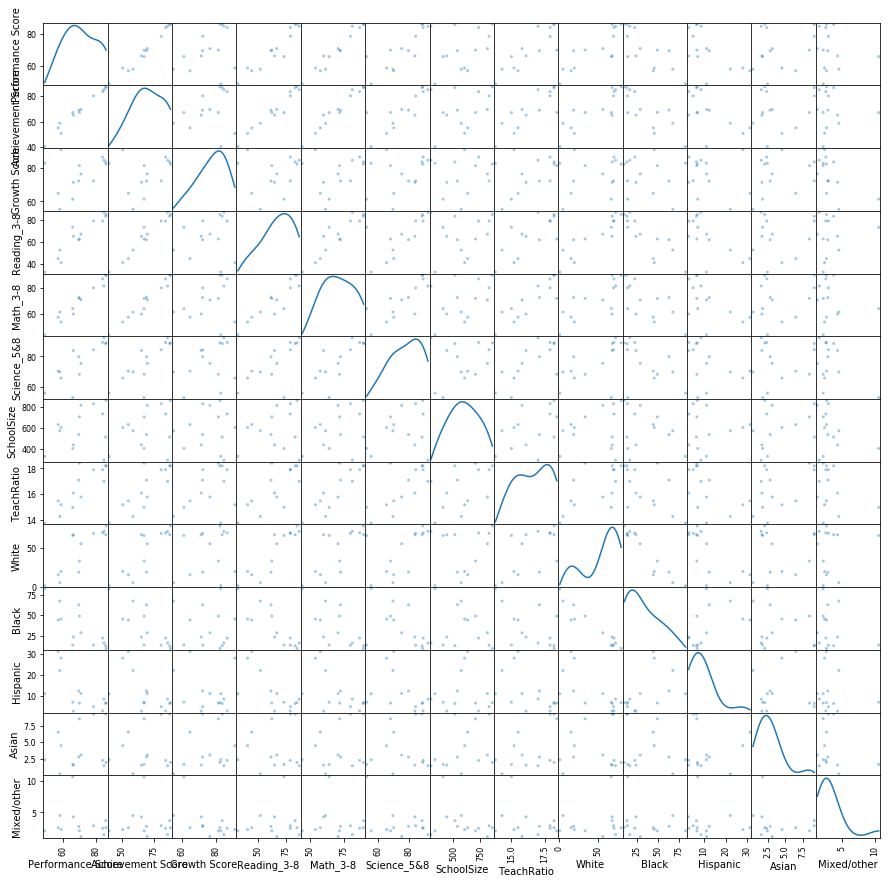

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(datdf, alpha=0.4, figsize=(15, 15), diagonal='kde')

In [16]:
#Sort schools based on Math_3-8 score
datdf.sort_values('Math_3-8', ascending = False, inplace= True)
datdf

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
12,Elizabeth Traditional Elementary,69.70,69.1,72.1,61.9,72.5,79.8,536.0,17.1,18.8,63.1,12.5,2.8,2.8
14,Myers Park Traditional,70.08,67.3,81.2,62.6,71.8,68.2,704.0,18.4,33.4,49.1,6.8,8.5,2.1
6,cotswold elementary,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2
1,charlotte lab,66.02,67.2,61.3,73.4,64.1,52.9,404.0,15.0,66.8,13.4,7.2,1.7,10.6
4,first ward creative arts academy,58.10,58.8,55.3,52.4,61.5,69.8,572.0,14.3,5.2,67.7,22.2,0.3,4.5


In [17]:
#Sorting based on reading scores
datdf.sort_values('Reading_3-8', ascending = False, inplace= True)
datdf

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
1,charlotte lab,66.02,67.2,61.3,73.4,64.1,52.9,404.0,15.0,66.8,13.4,7.2,1.7,10.6
6,cotswold elementary,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2
13,Eastover Elementary,66.42,65.2,71.3,65.1,60.0,83.9,438.0,16.1,67.8,23.3,3.0,1.6,4.3
14,Myers Park Traditional,70.08,67.3,81.2,62.6,71.8,68.2,704.0,18.4,33.4,49.1,6.8,8.5,2.1
12,Elizabeth Traditional Elementary,69.70,69.1,72.1,61.9,72.5,79.8,536.0,17.1,18.8,63.1,12.5,2.8,2.8


In [40]:
#Sorting based on science scores
datdf.sort_values('Science_5&8', ascending = False, inplace= True)
datdf

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
13,Eastover Elementary,66.42,65.2,71.3,65.1,60.0,83.9,438.0,16.1,67.8,23.3,3.0,1.6,4.3
12,Elizabeth Traditional Elementary,69.70,69.1,72.1,61.9,72.5,79.8,536.0,17.1,18.8,63.1,12.5,2.8,2.8
6,cotswold elementary,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2
11,Oakhurst STEAM Academy,57.12,55.2,64.8,44.6,57.6,70.3,631.0,15.5,15.5,44.2,31.2,6.5,2.6
4,first ward creative arts academy,58.10,58.8,55.3,52.4,61.5,69.8,572.0,14.3,5.2,67.7,22.2,0.3,4.5


<h2>Modeling the Schools based on Performance</h2>

In [18]:
#Need to import ML libraries
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
print("libraries imported successfully!")

libraries imported successfully!


In [39]:
#Remove objects from data frame
datdf = pd.read_csv(datDir)
datdf = datdf.dropna(axis=0)
datdf = datdf.drop(['School Name'],axis=1)

In [40]:
#Scale observations
X = scale(datdf)
print(X)

[[ 1.23952556e+00  1.15623193e+00  8.46936995e-01  1.29784542e+00
   8.16694815e-01  1.32770766e+00 -1.68113512e+00  3.61250026e-01
   9.52304446e-01 -8.32371646e-01 -3.46936168e-01 -8.32077027e-01
  -7.92232493e-01]
 [-3.79054599e-01 -1.35876480e-01 -1.48213974e+00  4.78689148e-01
  -4.53719341e-01 -1.89714283e+00 -1.04899606e+00 -9.69671123e-01
   7.56241766e-01 -9.41198720e-01 -5.19992214e-01 -7.64741314e-01
   3.29401931e+00]
 [-1.05303750e+00 -7.38860405e-01 -2.08709474e+00 -7.67853009e-01
  -6.46881728e-01 -5.13894775e-01 -1.00787477e-01 -1.43549353e+00
  -1.48032510e+00  1.42252532e+00  1.21056825e+00 -1.23609131e+00
   5.54883487e-01]
 [-1.83424496e+00 -2.05250396e+00  6.65450496e-01 -1.96690784e+00
  -1.92472521e+00 -1.65978073e+00 -1.47230347e+00 -1.76822381e+00
  -1.62555672e+00  2.08854701e+00 -5.85094251e-02 -5.29066318e-01
  -5.22809297e-01]
 [ 4.64396590e-02  4.35830218e-02  3.02477498e-02  1.04726501e-01
   3.66159468e-02 -5.55403909e-02  1.26508441e+00 -4.37302664e-01


In [41]:
datdf.head(15)

,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
0,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
1,66.02,67.2,61.3,73.4,64.1,52.9,404.0,15.0,66.8,13.4,7.2,1.7,10.6
4,58.10,58.8,55.3,52.4,61.5,69.8,572.0,14.3,5.2,67.7,22.2,0.3,4.5
5,48.92,40.5,82.6,32.2,44.3,55.8,329.0,13.8,1.2,83.0,11.2,2.4,2.1
6,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2
7,58.86,50.9,90.7,40.9,54.0,65.7,603.0,15.2,19.7,45.4,28.0,4.5,2.3
8,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
9,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
10,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
11,57.12,55.2,64.8,44.6,57.6,70.3,631.0,15.5,15.5,44.2,31.2,6.5,2.6


In [42]:
#Create ratings based on performance score 2=Excellent, 1 = moderate, 0 = poor
ratings_list = [2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2]
y = pd.DataFrame(ratings_list)
y.shape

(14, 1)

In [47]:
crap = pd.DataFrame(iris.feature_names)
crap.shape

(4, 1)

In [48]:
variable_names = ['Performance Score', 'Achievement Score','Growth Score','Reading_3-8','Math_3-8','Science_5&8','SchoolSize','TeachRatio','White','Black','Hispanic','Asian','Mixed/other']

In [49]:
#Cluster using kmeans
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [51]:
#Add column labels
datdf.columns=['Performance_Score', 'Achievement Score','Growth_Score','Reading_3-8','Math_3-8','Science_5&8','SchoolSize','TeachRatio','White','Black','Hispanic','Asian','Mixed/other']
y.columns=['Ratings']

Text(0.5, 1.0, 'K-Means Classification')

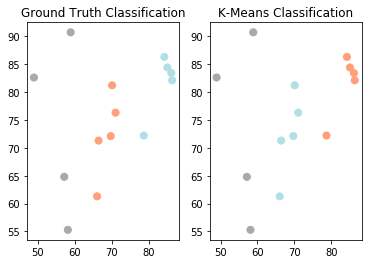

In [52]:
#Create classification scatter plot based on performance and growth score
color_theme = np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=datdf.Performance_Score,y=datdf.Growth_Score,c=color_theme[ratings_list], s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=datdf.Performance_Score,y=datdf.Growth_Score,c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')


Text(0.5, 1.0, 'K-Means Classification')

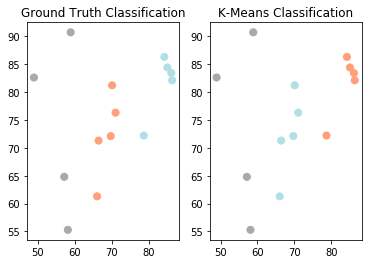

In [57]:
#Relabel the Ratings so that it matches 0,2,1
relabel = np.choose(clustering.labels_,[0,2,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=datdf.Performance_Score,y=datdf.Growth_Score,c=color_theme[ratings_list], s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=datdf.Performance_Score,y=datdf.Growth_Score,c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

In [58]:
#Very small data set so everything is perfectly fit. Can try with more data in the future
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

